In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X=[]  #feature matrix
y=[]  #Targeted attribute vector

In [3]:
with open("data1.csv","r") as read_file:
    lines=csv.reader(read_file)
    ds=list(lines)
    for i in range(len(ds)):
        temp=ds[i][0].split(",")
        a = float(temp[0])
        b = float(temp[1])
        c = int(temp[2],2)
        X.append([a,b])
        y.append([c])
        
#Adding one in matrix        
one=np.ones([len(X),1])
X=np.concatenate((one,X),axis=1)

#Doing Normalization

X=(X-np.mean(X))/np.std(X)
y=np.array(y)

In [4]:
#selecting features and targeted vector
#X = df.iloc[:,0:2].values
#y = df.iloc[:,-1:].values
#print(X)
#print(y)
m = len(X)
print(m)

100


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=50, test_size=0.3)
print(len(X_train),len(X_test),len(Y_train),len(Y_test))

70 30 70 30


In [6]:
#Initializing the parameter with zero
theta = np.matrix(np.zeros(3))

In [7]:
iters = 50

def sigmoid(x,theta):
    z=x*(theta.T)
    return 1.0/(1.0+np.exp(-z))

In [8]:
def del_j(X, Y, theta):
    hypo = sigmoid(X,theta)
    error = hypo - Y 
    return (error.T * X)/m

In [9]:
gz = 0.5
def hessian(X, theta):
    temp=[]
    hypo = sigmoid(X,theta)
    for i in range(0,len(X_train)):
        temp.append(gz)
    d=np.diag(np.array(temp))
    ie = np.matmul(X.T,d)
    return np.dot(ie,X)/ m

In [10]:
def newton_method(X, Y,theta, iteration):
    cost=[]
    for i in range(0, iteration):
        hypo = sigmoid(X,theta)
        error = hypo - Y
        y_1 = (-1) * Y.T * np.log(hypo)
        y_2 = - (1 - Y.T) * np.log((1-hypo))
        tmp = y_1 + y_2
        J = np.sum(tmp) / m
        cost.append(J)
        delta = del_j(X,Y,theta)
        h = hessian(X, theta)
        h_inv = np.linalg.inv(h)
        temp = delta * h_inv
        theta = theta - temp
    
    return theta,cost

parameters after Newtons Method implementation =  [[4.25798534 5.20246177 5.341987  ]]


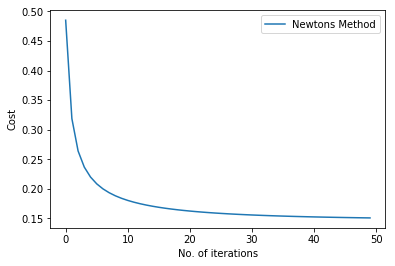

In [11]:
para,cost = newton_method(X_train, Y_train,theta, iters)
print("parameters after Newtons Method implementation = ", para)
it=np.arange(0,iters)
plt.plot(it,np.squeeze(cost),label="Newtons Method")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [12]:
# Calculating the Accuracy
y_predict = np.matmul(X_test, para.T)
y_predict = (-1) * y_predict
ex = np.exp(y_predict)
h = 1 + ex
y_predict = 1 / h
y_predict = np.where(y_predict >= 0.5,1,0)
y_predict = np.squeeze(y_predict)

count = 0
for i in range(0,len(y_predict)):
    if(y_predict[i] == Y_test[i]):
        count = count+1
print("predictions out of 30 test points is ",count)
accuracy =  (count / len(y_predict)) * 100
print("Accuracy achieved=", accuracy, "%")

predictions out of 30 test points is  26
Accuracy achieved= 86.66666666666667 %
